## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Connecting drive and importing data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ilab/dataset/pd_speech_features.csv")

In [4]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


## Getting the target variable and important features

In [5]:
y = df['class']

In [6]:
updated_df = df.copy().drop(columns=['id', 'class'], axis=1)

In [7]:
updated_df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164


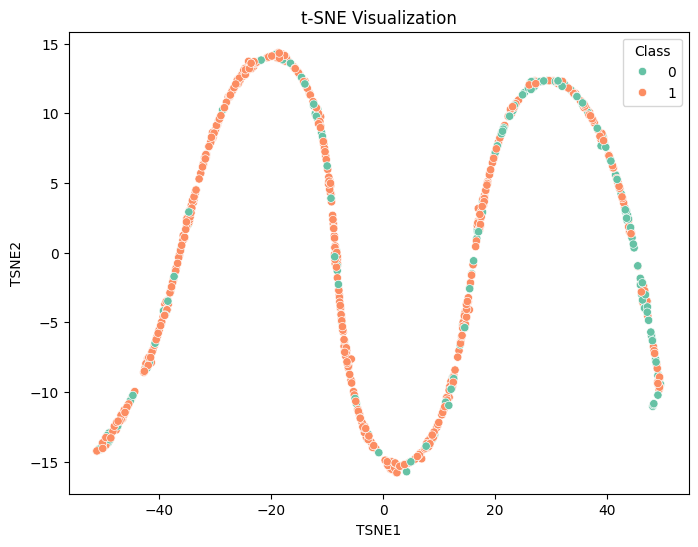

In [8]:
import seaborn as sns
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(updated_df)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

In [9]:
y.value_counts()

,count
class,
1,564
0,192


In [10]:
X_train, X_test, y_train, y_test = train_test_split(updated_df,y, test_size=0.2, random_state=12)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=12)

In [12]:
print("Training data: ", X_train.shape)
print("Validation data: ", X_val.shape)
print("Test data: ", X_test.shape)

Training data:  (483, 753)
Validation data:  (121, 753)
Test data:  (152, 753)


In [13]:
from sklearn.datasets import make_blobs
X_train_new,y_train_new = make_blobs(n_samples = X_train.shape[0],n_features = 2,centers = 2,random_state = 23)

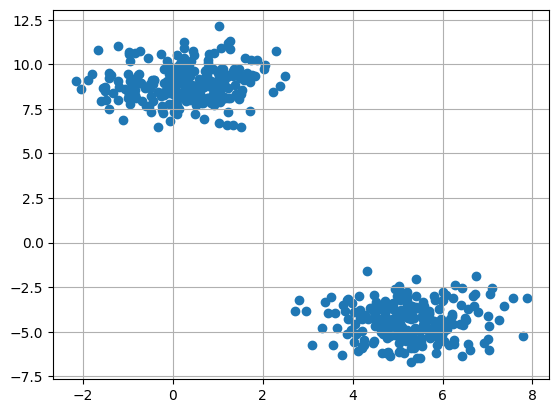

In [14]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X_train_new[:,0],X_train_new[:,1])
plt.show()

In [15]:
k = 2

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X_train_new.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []}}

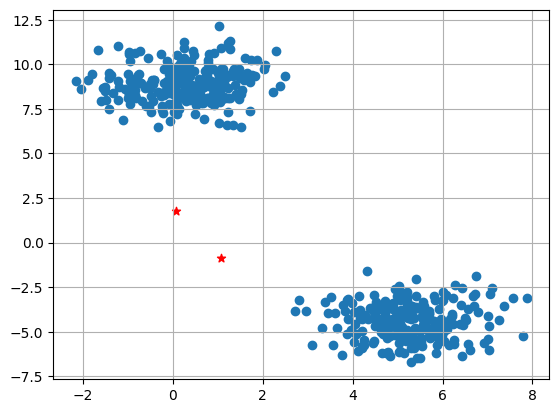

In [16]:
plt.scatter(X_train_new[:,0],X_train_new[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [17]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [18]:
#Implementing E step
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

#Implementing the M-Step
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters

In [19]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [20]:
clusters = assign_clusters(X_train_new,clusters)
clusters = update_clusters(X_train_new,clusters)
pred = pred_cluster(X_train_new,clusters)

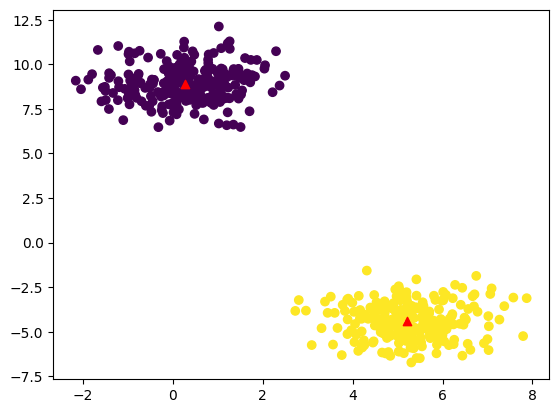

In [21]:
plt.scatter(X_train_new[:,0],X_train_new[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

** Calculating with Elbow method

In [22]:
from sklearn.cluster import KMeans
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X_train_new)
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

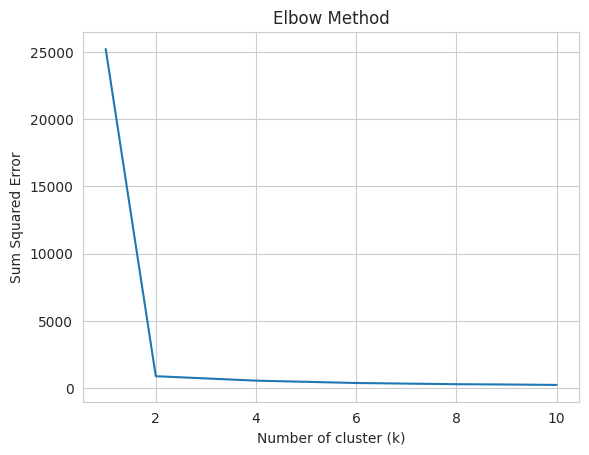

In [23]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

In [24]:
kmeans = KMeans(n_clusters = 2, random_state = 2)
kmeans.fit(X_train_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=2)

In [25]:
kmeans.cluster_centers_

array([[ 0.26738465,  8.90952302],
       [ 5.21854659, -4.39430715]])

In [26]:
pred = kmeans.fit_predict(X_train_new)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,

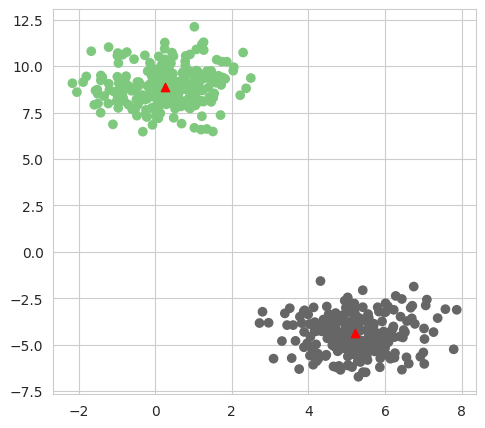

In [27]:
import matplotlib.cm as cm

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_train_new[:,0],X_train_new[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
# plt.xlabel("petal length (cm)")
# plt.ylabel("petal width (cm)")

# plt.subplot(1,2,2)
# plt.scatter(X_train_new[:,2],X_train_new[:,3],c = pred, cmap=cm.Accent)
# plt.grid(True)
# for center in kmeans.cluster_centers_:
#     center = center[2:4]
#     plt.scatter(center[0],center[1],marker = '^',c = 'red')
# plt.xlabel("sepal length (cm)")
# plt.ylabel("sepal width (cm)")
# plt.show()

## Training and testing K-Neighbors Classifier

In [ ]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=2)

In [ ]:
# # kmeans.fit(X_train)
# X_train["Cluster"] = kmeans.fit_predict(X_train)
# X_train["Cluster"] = X_train["Cluster"].astype("category")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# X_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,Cluster
182,149.818,163.417,144.786,0.00336,0.00002,0.00174,0.00198,0.00521,0.02145,0.198,...,0.03464,0.00595,23.008,0.329577,0.757180,-6.277170,0.109397,2.209021,0.156368,1
12,136.926,159.866,131.276,0.00293,0.00002,0.00118,0.00153,0.00355,0.01259,0.112,...,0.01968,0.00581,25.703,0.460600,0.646846,-6.547148,0.152813,2.041277,0.138512,1
124,156.239,195.107,79.820,0.00694,0.00004,0.00403,0.00395,0.01209,0.02343,0.224,...,0.03867,0.02020,19.196,0.618663,0.728421,-5.944191,0.143359,1.929715,0.181988,1
129,120.078,126.632,105.667,0.00270,0.00002,0.00116,0.00135,0.00349,0.01022,0.090,...,0.01428,0.00487,26.369,0.491345,0.718839,-5.892061,0.195976,2.108873,0.183572,1
24,163.656,200.841,76.779,0.00742,0.00005,0.00380,0.00390,0.01140,0.01659,0.164,...,0.02214,0.01778,23.831,0.397937,0.732479,-5.557447,0.220890,2.692176,0.215961,1


In [ ]:
# sns.relplot(
#     x="Longitude", y="Latitude", hue="Cluster", data=X_train, height=2,
# );

In [ ]:
# kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
# train_pred = kmeans.predict(X_train)

In [ ]:
# train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
# kmeans.cluster_centers_

Measuring baseline model accuracy and perfomance using Confusion Matrix

In [ ]:
# from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve, recall_score, precision_score
# train_acc = accuracy_score(y_train, train_pred)
# train_precision = precision_score(y_train, train_pred)
# train_roc_auc_score = roc_auc_score(y_train, train_pred)
# train_recall = recall_score(y_train, train_pred)
# train_f1 = f1_score(y_train, train_pred)
# train_roc_curve = roc_curve(y_train, train_pred)

In [ ]:
# print(f"The training data accuracy is : {train_acc}")
# print(f"The training data precision is : {train_precision}")
# print(f"The training data recall is : {train_recall}")
# print(f"The training data f1-score is : {train_f1}")
# print(f"The training data ROC curve is : {train_roc_curve}")
# print(f"The training data ROC-AUC score is : {train_roc_auc_score}")

In [ ]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion_matrix_train_dt = confusion_matrix(y_train, train_pred)
# cm_train_dt = ConfusionMatrixDisplay(confusion_matrix_train_dt)

# cm_train_dt.plot()
# plt.show()

## Predicting test data

In [ ]:
# test_preds = knc.predict(X_test)

In [ ]:
# test_acc = accuracy_score(y_test, test_preds)
# test_precision = precision_score(y_test, test_preds)
# test_roc_auc_score = roc_auc_score(y_test, test_preds)
# test_recall = recall_score(y_test, test_preds)
# test_f1 = f1_score(y_test, test_preds)
# test_roc_curve = roc_curve(y_test, test_preds)

In [ ]:
# print(f"The test data accuracy is : {test_acc}")
# print(f"The test data precision is : {test_precision}")
# print(f"The test data recall is : {test_recall}")
# print(f"The test data f1-score is : {test_f1}")
# print(f"The test data ROC curve is : {test_roc_curve}")
# print(f"The test data ROC-AUC score is : {test_roc_auc_score}")

In [ ]:
# confusion_matrix_test_dt = confusion_matrix(y_test, test_preds)
# cm_test_dt = ConfusionMatrixDisplay(confusion_matrix_test_dt)

# cm_test_dt.plot()
# plt.show()